In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\dhrit\Downloads\test.csv")

In [3]:
print("Data Preview:\n", df.head())
print("\nColumns in Dataset:\n", df.columns.tolist())

Data Preview:
    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ..

In [4]:
target_column = df.columns[-1]  # automatically using last column as target
print(f"\nUsing '{target_column}' as target column")


Using 'Activity' as target column


In [5]:
X = df.drop(target_column, axis=1)
y = df[target_column]

In [6]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
y_pred = model.predict(X_test)

In [10]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9751412429378531

Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       170
           SITTING       0.99      0.93      0.96       152
          STANDING       0.92      0.99      0.95       137
           WALKING       0.99      0.99      0.99       154
WALKING_DOWNSTAIRS       0.98      0.95      0.97       123
  WALKING_UPSTAIRS       0.97      0.99      0.98       149

          accuracy                           0.98       885
         macro avg       0.97      0.97      0.97       885
      weighted avg       0.98      0.98      0.98       885



In [11]:
cm = confusion_matrix(y_test, y_pred)

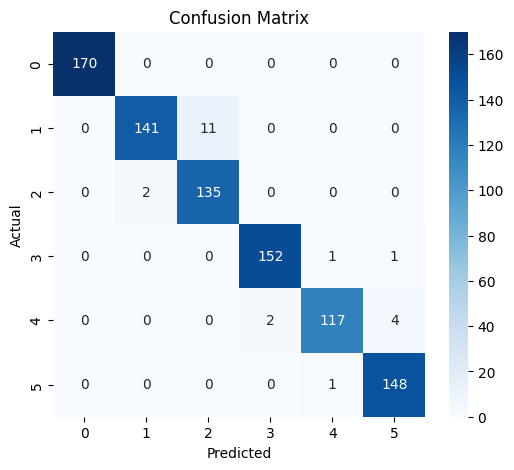

In [12]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

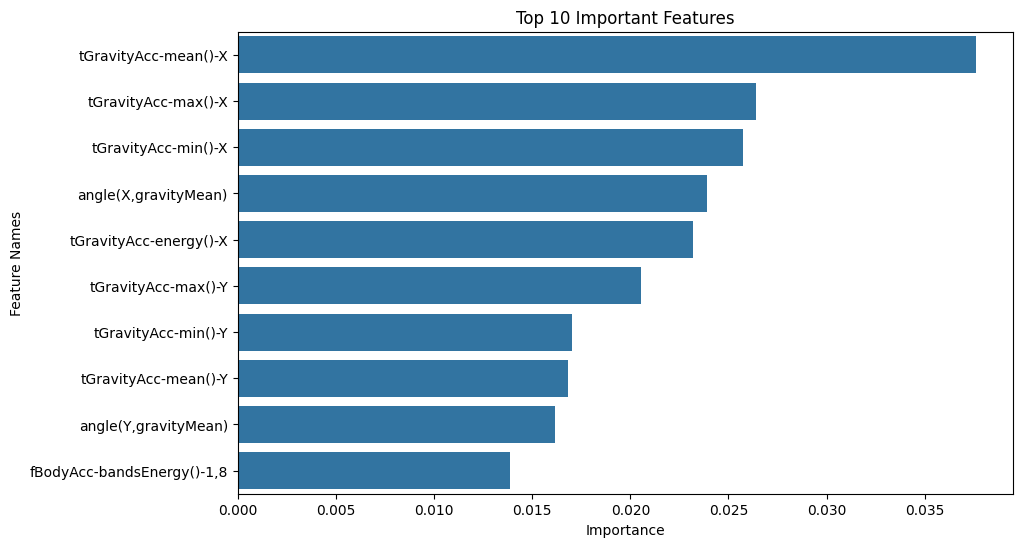

In [13]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10])
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature Names")
plt.show()

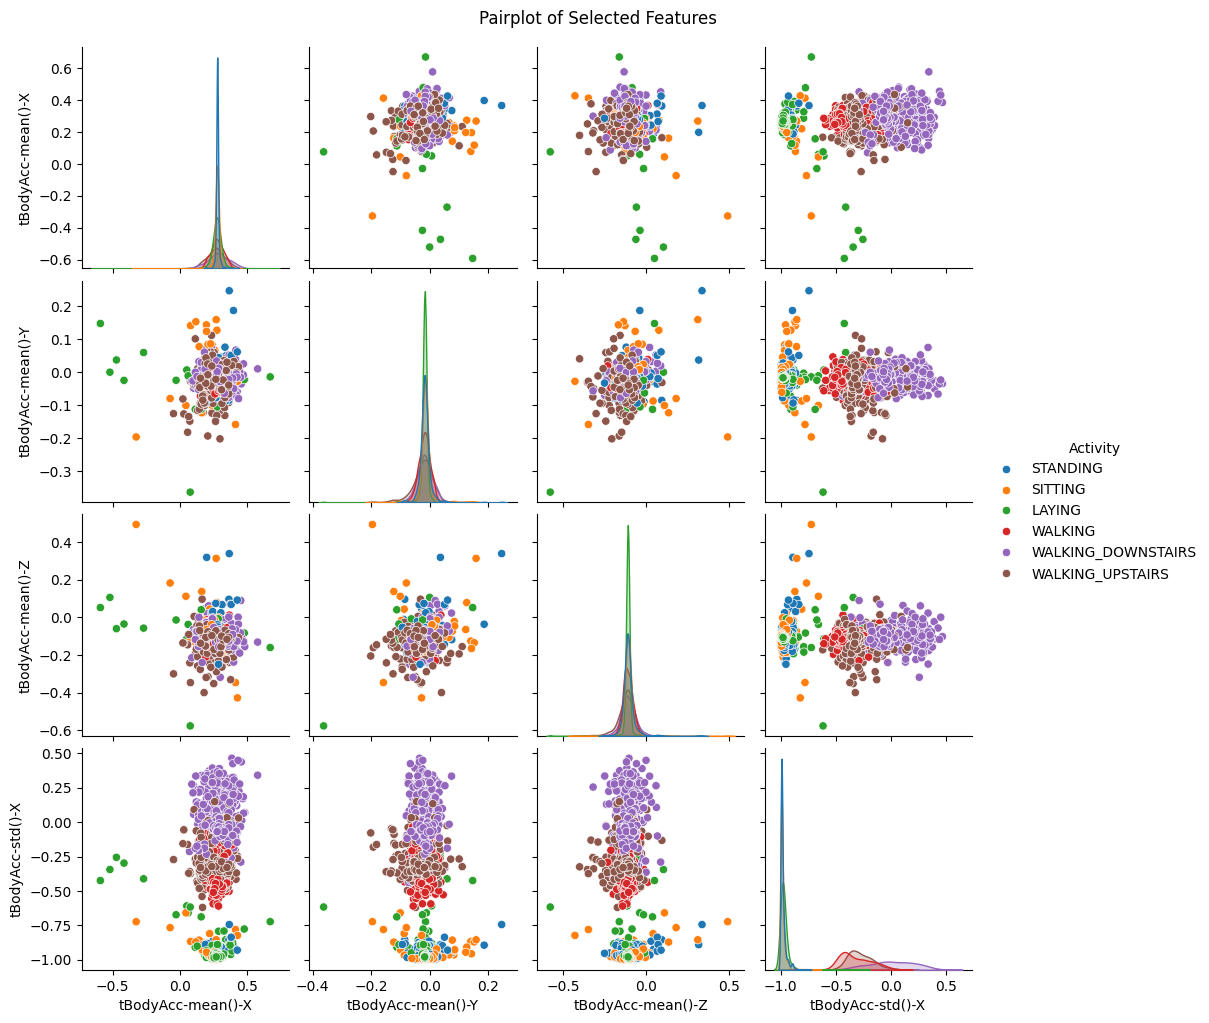

In [ ]:
# Only plot up to 4 numeric columns to avoid clutter
pairplot_cols = X.columns[:4].tolist() + [target_column]
pair_df = df[pairplot_cols]

sns.pairplot(pair_df, hue=target_column, diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()